In [2]:
#importing libraries 
import numpy as np 
import pandas as pd
# Importing libraries to plot graphs
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from scipy.stats import zscore

In [6]:
new_df = pd.read_csv('X_competition_train.csv', dtype='float32')

In [7]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label,field_id
0,29.0,40.0,57.0,29.0,41.0,60.0,24.0,33.0,52.0,27.0,37.0,55.0,20.0,23.0,50.0,2.0,3020.0
1,30.0,41.0,57.0,30.0,39.0,58.0,25.0,34.0,51.0,29.0,39.0,57.0,20.0,25.0,53.0,2.0,3020.0
2,30.0,43.0,58.0,30.0,43.0,61.0,25.0,36.0,55.0,30.0,41.0,57.0,23.0,26.0,53.0,2.0,3020.0
3,32.0,43.0,63.0,30.0,44.0,64.0,24.0,33.0,52.0,30.0,41.0,59.0,20.0,24.0,51.0,2.0,3020.0
4,28.0,42.0,58.0,32.0,42.0,60.0,25.0,34.0,53.0,28.0,40.0,58.0,21.0,24.0,52.0,2.0,3020.0


In [8]:
new_df.shape

(65813965, 17)

In [9]:
# getting total null values for each column 
new_df.isnull().sum()

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
label       0
field_id    0
dtype: int64

In [10]:
# checking unique values in Class_Name 
new_df['label'].unique()

array([2., 3., 5., 1., 9., 7., 6., 4., 8.], dtype=float32)

In [11]:
# Each field has several pixels in the data. Here our goal is to build a Random Forest (RF) model using the average values
# of the pixels within each field. So, we use `groupby` to take the mean for each field_id
data_grouped = new_df.groupby('field_id').mean().reset_index()
data_grouped

,field_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,0.0,32.250000,47.566666,68.816666,31.883333,47.583332,69.266670,30.900000,46.200001,68.333336,30.150000,45.000000,65.933334,27.983334,41.516666,63.549999,5.483333
1,1.0,23.114147,30.607718,58.736336,21.596462,29.223473,57.065918,20.252411,27.516077,50.303860,23.000000,30.237942,48.397106,15.840836,15.077170,51.408360,4.000000
2,2.0,32.043480,46.913044,73.913040,34.391304,46.695652,73.347824,24.000000,36.173912,56.478260,26.739130,37.695652,55.391304,20.782608,27.565218,49.347828,7.000000
3,3.0,45.167095,63.654243,94.773781,23.071980,35.622108,62.772495,27.208227,39.453728,65.179947,26.467867,39.048843,63.336761,30.428020,41.363754,60.556557,6.000000
4,4.0,45.847683,61.059601,82.986755,40.158939,54.165562,76.940399,28.092714,39.218544,58.317883,35.629139,47.847683,67.000000,45.384106,59.947021,81.132454,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87109,122731.0,27.426470,37.628677,81.180145,26.882353,37.290440,75.522057,25.919117,37.852940,73.558823,22.036764,30.003677,65.025734,19.356617,26.352942,56.985294,4.000000
87110,122732.0,35.729809,59.660793,73.679886,34.634361,60.064610,77.900146,36.397945,62.906021,80.721001,35.008812,60.400883,75.243759,34.177681,60.627018,78.942734,5.000000
87111,122733.0,19.784615,22.507692,53.661537,17.507692,20.646154,54.061539,16.507692,18.092308,55.861538,16.523077,17.107693,56.169231,17.061539,18.076923,59.461540,2.000000
87112,122735.0,21.527779,16.388889,131.805557,20.180555,14.166667,129.388885,22.069445,16.861111,129.513885,21.666666,17.222221,121.722221,20.944445,16.138889,112.319443,3.000000


In [12]:
# save dataset 
data_grouped.to_csv('data_grouped_train.csv', index = False)

In [14]:
### display number of sample points in each class 
data_grouped.groupby(['label']).size()

label
1.000000     8337
1.000778        1
1.001469        1
1.046358        1
1.999248        1
2.000000    13914
2.012422        1
2.051282        1
2.999272        1
3.000000     7913
3.001813        1
4.000000    24224
4.010571        1
5.000000     8135
5.002564        1
5.002637        1
5.483333        1
5.999586        1
6.000000     8245
6.000580        1
6.000763        1
6.001321        1
6.993220        1
6.998613        1
6.999026        1
6.999465        1
7.000000    10708
8.000000     1494
8.996128        1
8.998776        1
9.000000     4122
dtype: int64

In [15]:
# checking unique values in Class_Name 
data_grouped['label'].unique()

array([5.483333 , 4.       , 7.       , 6.       , 8.       , 5.       ,
       2.       , 9.       , 3.       , 1.       , 2.0512822, 3.0018132,
       1.0463576, 6.000763 , 5.002564 , 1.0007781, 1.9992481, 2.9992716,
       6.9994645, 6.999026 , 5.002637 , 8.998776 , 6.0005803, 5.999586 ,
       8.996128 , 4.010571 , 6.9932203, 1.0014693, 6.9986134, 6.001321 ,
       2.0124223], dtype=float32)

In [23]:
# removing the decimel labels 
label = ['4.','7.','6.','8.','5.','2.','9.','3.','1.']

In [24]:
new_df = data_grouped[~data_grouped['label'].isin(label)]

In [25]:
new_df['label'].unique()

array([5.483333 , 2.0512822, 3.0018132, 1.0463576, 6.000763 , 5.002564 ,
       1.0007781, 1.9992481, 2.9992716, 6.9994645, 6.999026 , 5.002637 ,
       8.998776 , 6.0005803, 5.999586 , 8.996128 , 4.010571 , 6.9932203,
       1.0014693, 6.9986134, 6.001321 , 2.0124223], dtype=float32)

In [86]:
# removing the decimal labels from the dataframe
new_df1 = data_grouped.drop(new_df.index)
new_df1

,field_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
1,1.0,23.114147,30.607718,58.736336,21.596462,29.223473,57.065918,20.252411,27.516077,50.303860,23.000000,30.237942,48.397106,15.840836,15.077170,51.408360,4.0
2,2.0,32.043480,46.913044,73.913040,34.391304,46.695652,73.347824,24.000000,36.173912,56.478260,26.739130,37.695652,55.391304,20.782608,27.565218,49.347828,7.0
3,3.0,45.167095,63.654243,94.773781,23.071980,35.622108,62.772495,27.208227,39.453728,65.179947,26.467867,39.048843,63.336761,30.428020,41.363754,60.556557,6.0
4,4.0,45.847683,61.059601,82.986755,40.158939,54.165562,76.940399,28.092714,39.218544,58.317883,35.629139,47.847683,67.000000,45.384106,59.947021,81.132454,8.0
5,6.0,29.994318,37.738636,80.744316,29.147728,36.630680,73.278412,27.312500,35.318180,71.267044,24.971590,31.988636,77.835228,21.352272,25.613636,64.704544,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87109,122731.0,27.426470,37.628677,81.180145,26.882353,37.290440,75.522057,25.919117,37.852940,73.558823,22.036764,30.003677,65.025734,19.356617,26.352942,56.985294,4.0
87110,122732.0,35.729809,59.660793,73.679886,34.634361,60.064610,77.900146,36.397945,62.906021,80.721001,35.008812,60.400883,75.243759,34.177681,60.627018,78.942734,5.0
87111,122733.0,19.784615,22.507692,53.661537,17.507692,20.646154,54.061539,16.507692,18.092308,55.861538,16.523077,17.107693,56.169231,17.061539,18.076923,59.461540,2.0
87112,122735.0,21.527779,16.388889,131.805557,20.180555,14.166667,129.388885,22.069445,16.861111,129.513885,21.666666,17.222221,121.722221,20.944445,16.138889,112.319443,3.0


In [28]:
new_df1['label'].unique()

array([4., 7., 6., 8., 5., 2., 9., 3., 1.], dtype=float32)

In [85]:
### display number of sample points in each class 
new_df1.groupby(['label']).size()

label
1.0     8337
2.0    13914
3.0     7913
4.0    24224
5.0     8135
6.0     8245
7.0    10708
8.0     1494
9.0     4122
dtype: int64

In [30]:
### Identify the number of unique classes in dataset. 
c_count = new_df1['label'].nunique()
c_count

9

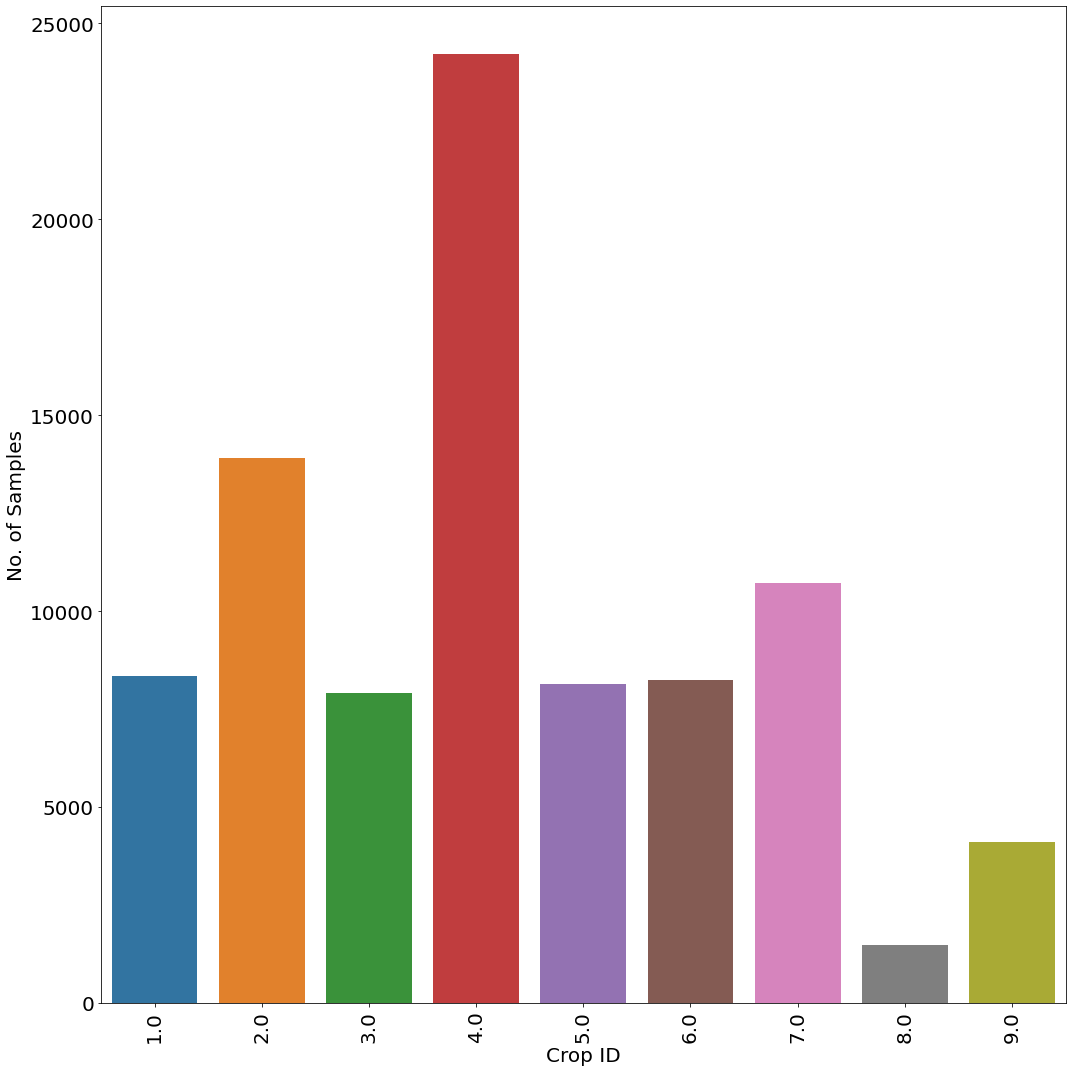

In [31]:
### Visualise the data samples for each class 
plt.figure(figsize= (15,15)) # defining plot size

sns.countplot(x = 'label', data = new_df1) #assigning inputs for x and y axis

plt.xticks(ticks = range(c_count),rotation = 90 
           ,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Crop ID', fontsize = 20)
plt.ylabel('No. of Samples', fontsize = 20)
plt.tight_layout()
plt.show()

In [39]:
# function to create boxplot by class
def box_plot_by_class(df, feature_cols, class_label):
    single_class_df = df.loc[df['label'] == selected_class].copy()
    single_class_df[feature_cols].plot.box(title ='class :' +str(class_label), rot = 90 , fontsize = 10, figsize = (15,10))

In [34]:
selected_class = 1.

In [35]:
feature_cols = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']

In [36]:
additional_cols = ['field_id','label']

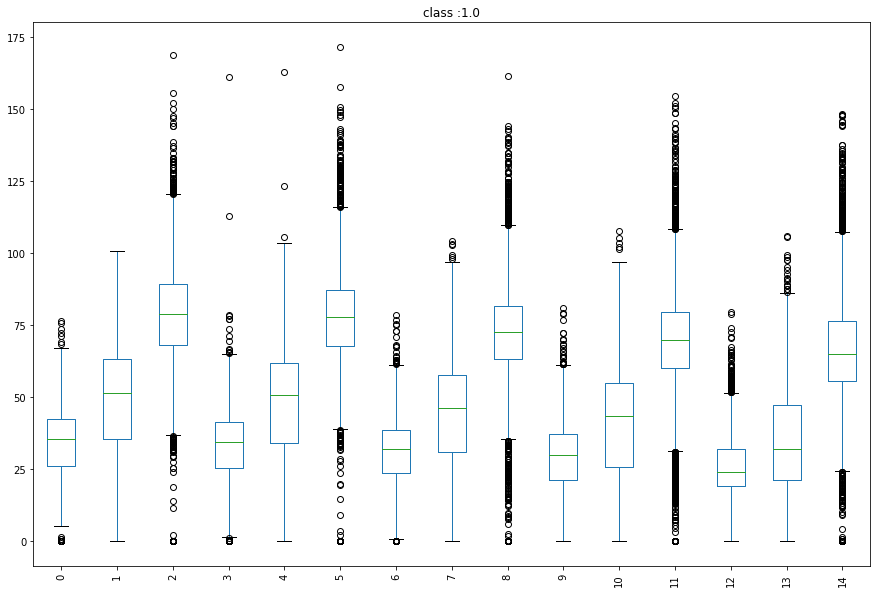

In [40]:
box_plot_by_class(new_df1, feature_cols, selected_class)

In [41]:
# removal of outliers 
def add_absolute_zscore(df,cols):
    new_df = df.copy() # To avoid any unintended side effects
    for col in cols:
        new_df[col+'_Z_score'] = np.abs(zscore(new_df[col]))
    return new_df

In [43]:
# # remove filed id 
# del new_df1['field_id','label']

In [87]:
# get zscore for each feature column
z_score_df =add_absolute_zscore(new_df1,feature_cols)
z_score_df

,field_id,0,1,2,3,4,5,6,7,8,...,5_Z_score,6_Z_score,7_Z_score,8_Z_score,9_Z_score,10_Z_score,11_Z_score,12_Z_score,13_Z_score,14_Z_score
1,1.0,23.114147,30.607718,58.736336,21.596462,29.223473,57.065918,20.252411,27.516077,50.303860,...,1.008357,0.876991,0.932286,1.120306,0.517924,0.628887,0.995617,0.937379,1.220724,0.644628
2,2.0,32.043480,46.913044,73.913040,34.391304,46.695652,73.347824,24.000000,36.173912,56.478260,...,0.031723,0.550552,0.436288,0.754421,0.195364,0.212701,0.599167,0.501324,0.529859,0.758711
3,3.0,45.167095,63.654243,94.773781,23.071980,35.622108,62.772495,27.208227,39.453728,65.179947,...,0.643824,0.271094,0.248391,0.238772,0.218765,0.137185,0.148798,0.349772,0.233504,0.138134
4,4.0,45.847683,61.059601,82.986755,40.158939,54.165562,76.940399,28.092714,39.218544,58.317883,...,0.261215,0.194050,0.261865,0.645407,0.571541,0.353844,0.058844,1.669475,1.261570,1.001061
5,6.0,29.994318,37.738636,80.744316,29.147728,36.630680,73.278412,27.312500,35.318180,71.267044,...,0.027289,0.262012,0.485312,0.121940,0.347843,0.531188,0.673014,0.451058,0.637825,0.091521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87109,122731.0,27.426470,37.628677,81.180145,26.882353,37.290440,75.522057,25.919117,37.852940,73.558823,...,0.170612,0.383384,0.340099,0.257747,0.601018,0.641961,0.053062,0.627152,0.596925,0.335859
87110,122732.0,35.729809,59.660793,73.679886,34.634361,60.064610,77.900146,36.397945,62.906021,80.721001,...,0.322524,0.529390,1.095166,0.682167,0.518028,1.054390,0.526123,0.680637,1.299188,0.879826
87111,122733.0,19.784615,22.507692,53.661537,17.507692,20.646154,54.061539,16.507692,18.092308,55.861538,...,1.200276,1.203181,1.472164,0.790967,1.076662,1.361636,0.555072,0.829666,1.054772,0.198760
87112,122735.0,21.527779,16.388889,131.805557,20.180555,14.166667,129.388885,22.069445,16.861111,129.513885,...,3.611600,0.718716,1.542698,3.573558,0.632945,1.355244,3.160645,0.487044,1.161988,2.727743


In [45]:
# look at description of all columns 
z_score_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,5_Z_score,6_Z_score,7_Z_score,8_Z_score,9_Z_score,10_Z_score,11_Z_score,12_Z_score,13_Z_score,14_Z_score
count,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,...,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000,87092.000000
mean,32.746918,46.740868,74.162155,31.758459,46.002167,72.851212,30.320446,43.789490,69.209282,29.003801,...,0.750148,0.784872,0.807336,0.733095,0.786360,0.815031,0.738809,0.772509,0.808528,0.738366
std,11.880965,17.867157,16.894072,11.529855,17.555834,15.654555,11.480267,17.455481,16.875326,11.592122,...,0.661274,0.619661,0.590096,0.680130,0.617773,0.579420,0.673918,0.635007,0.588461,0.674405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000014,0.000019,0.000036,0.000029,0.000026,0.000012,0.000002,0.000018,0.000004,0.000012
25%,24.090910,33.314683,64.555815,23.228540,32.646276,63.200001,22.171272,30.924792,59.294117,20.482729,...,0.287730,0.327957,0.347246,0.272898,0.336992,0.367808,0.270508,0.332153,0.368218,0.273763
50%,32.076790,46.492344,74.111115,31.096273,45.871483,72.229874,29.388755,43.022104,68.217663,27.843974,...,0.605451,0.669465,0.711007,0.573511,0.677591,0.732060,0.562486,0.644910,0.711507,0.567579
75%,40.736701,59.729079,84.191385,39.481840,58.825181,82.099998,37.422355,55.671421,78.580898,35.962943,...,1.029751,1.085893,1.139774,0.972205,1.076209,1.143542,0.981370,1.007986,1.103640,0.972151
max,128.260605,129.115158,190.494827,161.073502,162.752411,199.270798,110.291664,130.944443,188.601776,107.305557,...,8.075624,6.966012,4.993014,7.075015,6.754778,4.843112,7.517981,8.489231,5.366692,6.876139


In [66]:
# z_score_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', 'label', '0_Z_score', '1_Z_score', '2_Z_score', '3_Z_score',
       '4_Z_score', '5_Z_score', '6_Z_score', '7_Z_score', '8_Z_score',
       '9_Z_score', '10_Z_score', '11_Z_score', '12_Z_score', '13_Z_score',
       '14_Z_score'],
      dtype='object')

In [67]:
# # defining columns with Z_Score
# cols = ['0_Z_score', '1_Z_score', '2_Z_score', '3_Z_score',
#        '4_Z_score', '5_Z_score', '6_Z_score', '7_Z_score', '8_Z_score',
#        '9_Z_score', '10_Z_score', '11_Z_score', '12_Z_score', '13_Z_score',
#        '14_Z_score']

In [69]:
# # performing querry on the dataframe 
# z_score_df['outliers'] = z_score_df.eval(query_string)

In [88]:
from scipy import stats
data = new_df1[(np.abs(stats.zscore(new_df1)) < 3).all(axis=1)]
data

,field_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
1,1.0,23.114147,30.607718,58.736336,21.596462,29.223473,57.065918,20.252411,27.516077,50.303860,23.000000,30.237942,48.397106,15.840836,15.077170,51.408360,4.0
2,2.0,32.043480,46.913044,73.913040,34.391304,46.695652,73.347824,24.000000,36.173912,56.478260,26.739130,37.695652,55.391304,20.782608,27.565218,49.347828,7.0
3,3.0,45.167095,63.654243,94.773781,23.071980,35.622108,62.772495,27.208227,39.453728,65.179947,26.467867,39.048843,63.336761,30.428020,41.363754,60.556557,6.0
4,4.0,45.847683,61.059601,82.986755,40.158939,54.165562,76.940399,28.092714,39.218544,58.317883,35.629139,47.847683,67.000000,45.384106,59.947021,81.132454,8.0
5,6.0,29.994318,37.738636,80.744316,29.147728,36.630680,73.278412,27.312500,35.318180,71.267044,24.971590,31.988636,77.835228,21.352272,25.613636,64.704544,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87108,122729.0,29.582052,39.433334,63.576923,29.366667,40.046154,63.207691,28.464102,38.582050,64.674362,23.005129,28.628204,57.207691,23.294872,28.828205,56.279488,1.0
87109,122731.0,27.426470,37.628677,81.180145,26.882353,37.290440,75.522057,25.919117,37.852940,73.558823,22.036764,30.003677,65.025734,19.356617,26.352942,56.985294,4.0
87110,122732.0,35.729809,59.660793,73.679886,34.634361,60.064610,77.900146,36.397945,62.906021,80.721001,35.008812,60.400883,75.243759,34.177681,60.627018,78.942734,5.0
87111,122733.0,19.784615,22.507692,53.661537,17.507692,20.646154,54.061539,16.507692,18.092308,55.861538,16.523077,17.107693,56.169231,17.061539,18.076923,59.461540,2.0


In [101]:
data.to_csv('data_train1.csv', index = False)

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from flaml import AutoML
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, f1_score, precision_score, recall_score

In [77]:
## Define a function to plot confusion matrix 
# plot confusion matrix 

def plot_confusion_matrix(y_test, y_pred , model_name):
    
    """
    Function takes y_test, y_pred and model_name from the machine learning models
    Returns a plot of confusion matrix with labels marked  
    """
    
    # create confusion matrix using the y_pre and y_test
    cm = confusion_matrix(y_pred, y_test)
    
    # set columns
    classes_unique = y_train.unique()
    columns = sorted(classes_unique)
    
    #Create a plot instance
    fig, ax = plt.subplots(figsize = (20,20))
    df_cm = pd.DataFrame(cm, index = columns, columns = columns)

    ax = sns.heatmap(df_cm, cmap='nipy_spectral_r', annot=True,  annot_kws={"size": 15},  fmt=".1f")
    
     
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(y_test.unique())))
    ax.set_yticks(np.arange(len(y_test.unique())))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(sorted(y_test.unique()))
    ax.set_yticklabels(sorted(y_test.unique()))
    
    #Set labels
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center", va = "center_baseline", rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(len(cm)):
#         for j in range(len(cm)):
#             text = ax.text(j, i, cm[i, j],
#                            ha="center", va="center", color="w")

        
    ax.set_title("Confusion Matrix for "+model_name+" Model")
    sns.set(font_scale=1.6)

    fig.tight_layout()
    return plt.show()

In [78]:
# Define function to estimate model scores 
results_df = pd.DataFrame(columns = ['Model','Balanced Accuracy','Accuracy','Precision','Recall',
                                    'F1 Score','Train Score','Test Score','Best_params'])

def calculate_scores(y_test, y_pred, train_score, test_score, best_params, model, df):
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred , average = 'weighted')
    rec = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    train_Score = train_score
    test_score = test_score
    best_params = best_params
    
    result_list = [model, balanced_accuracy, accuracy, prec, rec, f1, train_score, test_score, best_params]
    
    df.loc[len(df)] = result_list
    
    return df

In [81]:
# store land use classes name sorted by land use class_id
lc_class_name_list = data.groupby('label')['label'].apply(lambda x: list(np.unique(x)))
lc_class_name_list = lc_class_name_list.explode('label').tolist()

In [82]:
lc_class_name_list

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [131]:
len(lc_class_name_list)

9

In [89]:
# Split train and test
# We use field_ids to split the data to train and test. Note that the test portion for training is different than the test 
# portion provided as part of the competition. 
train_per = 0.7

n_fields = len(data['field_id'])
np.random.seed(10)
train_fields = np.random.choice(data['field_id'], int(n_fields * train_per), replace=False)
test_fields = data['field_id'][~np.in1d(data['field_id'], train_fields)]

In [ ]:
X_train, X_test = data[data['field_id'].isin(train_fields)], data[data['field_id'].isin(test_fields)]
X_train = X_train.drop(columns=['label', 'field_id'])
X_test = X_test.drop(columns=['label', 'field_id'])
y_train, y_test = data[data['field_id'].isin(train_fields)]['label'], data[data['field_id'].isin(test_fields)]['label']

In [96]:
print(len(X_train))
print(len(X_test))

58016
24865


In [97]:
## Number of data points in training data 
y_train.value_counts()

4.0    16716
2.0     9354
7.0     7027
1.0     5556
6.0     5393
5.0     5294
3.0     5141
9.0     2524
8.0     1011
Name: label, dtype: int64

In [98]:
settings = {
    "time_budget": 2000,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type    
    "log_file_name": 'classification1.log',  # flaml log file
    "seed": 123,    # random seed
}

In [99]:
automl2 = AutoML()
automl2.fit(X_train, y_train,**settings)

[flaml.automl: 09-30 11:33:47] {1432} INFO - Evaluation method: cv
[flaml.automl: 09-30 11:33:47] {1478} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 09-30 11:33:47] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 09-30 11:33:47] {1748} INFO - iteration 0, current learner lgbm
[flaml.automl: 09-30 11:33:48] {1866} INFO - Estimated sufficient time budget=7553s. Estimated necessary time budget=137s.
[flaml.automl: 09-30 11:33:48] {1944} INFO -  at 1.0s,	estimator lgbm's best error=0.6808,	best estimator lgbm's best error=0.6808
[flaml.automl: 09-30 11:33:48] {1748} INFO - iteration 1, current learner lgbm
[flaml.automl: 09-30 11:33:49] {1944} INFO -  at 2.0s,	estimator lgbm's best error=0.6290,	best estimator lgbm's best error=0.6290
[flaml.automl: 09-30 11:33:49] {1748} INFO - iteration 2, current learner lgbm
[flaml.automl: 09-30 11:33:50] {1944} INFO -  at 3.0s,	estimator lgbm's best error=0.6050,

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[flaml.automl: 09-30 11:46:20] {1944} INFO -  at 752.9s,	estimator lrl1's best error=0.5450,	best estimator lgbm's best error=0.4549
[flaml.automl: 09-30 11:46:20] {1748} INFO - iteration 34, current learner rf
[flaml.automl: 09-30 11:46:28] {1944} INFO -  at 760.7s,	estimator rf's best error=0.5831,	best estimator lgbm's best error=0.4549
[flaml.automl: 09-30 11:46:28] {1748} INFO - iteration 35, current learner lrl1
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\HP\.c

In [132]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl2.best_estimator)
print('Best hyperparmeter config:', automl2.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl2.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl2.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 277, 'num_leaves': 1239, 'min_child_samples': 35, 'learning_rate': 0.08153214480517587, 'log_max_bin': 9, 'colsample_bytree': 0.8378621089274199, 'reg_alpha': 0.0009765625, 'reg_lambda': 6.760157438231468}
Best accuracy on validation data: 0.5465
Training duration of best run: 345.8 s


In [105]:
data_test = pd.read_csv('X_competition_test.csv')

In [107]:
competition_test_df = pd.read_csv('competition_test.csv')

In [110]:
tile_ids_test = competition_test_df['tile_id'].unique()
tile_ids_test

array([ 590, 1026,  100, ...,  382,  349,  947], dtype=int64)

In [112]:
data_test = data_test[data_test.field_id != 0]
data_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,field_id
0,44.0,62.0,84.0,45.0,61.0,82.0,47.0,61.0,85.0,47.0,65.0,86.0,42.0,60.0,81.0,102896.0
1,45.0,62.0,84.0,42.0,60.0,80.0,46.0,65.0,88.0,45.0,63.0,86.0,40.0,57.0,77.0,102896.0
2,41.0,60.0,80.0,42.0,58.0,77.0,44.0,62.0,84.0,44.0,60.0,82.0,38.0,53.0,76.0,102896.0
3,43.0,59.0,80.0,43.0,58.0,78.0,44.0,62.0,82.0,43.0,60.0,81.0,40.0,55.0,75.0,102896.0
4,44.0,61.0,80.0,44.0,60.0,79.0,44.0,61.0,84.0,45.0,62.0,83.0,42.0,58.0,77.0,102896.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27572132,34.0,51.0,70.0,34.0,50.0,73.0,34.0,52.0,74.0,30.0,46.0,72.0,31.0,46.0,75.0,61236.0
27572133,36.0,52.0,74.0,37.0,54.0,77.0,37.0,54.0,77.0,33.0,48.0,73.0,32.0,47.0,74.0,61236.0
27572134,38.0,54.0,73.0,36.0,52.0,76.0,36.0,53.0,78.0,33.0,50.0,72.0,32.0,48.0,74.0,61236.0
27572135,38.0,56.0,76.0,37.0,55.0,77.0,38.0,57.0,77.0,35.0,52.0,74.0,35.0,50.0,75.0,61236.0


In [113]:
data_test_grouped = data_test.groupby('field_id').mean().reset_index()
data_test_grouped

,field_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5.0,37.520223,49.124128,61.799163,37.486750,49.991632,64.218968,33.453278,43.214784,54.471409,27.702929,35.867503,43.847978,19.259414,25.662483,41.065551
1,10.0,21.932465,34.040039,53.137000,21.264351,33.236855,53.280753,20.407622,27.798842,48.596237,17.765557,21.308249,57.735649,18.106609,12.701399,80.054510
2,11.0,43.307474,58.715232,78.382214,39.543992,53.197729,70.063387,45.402081,61.543046,82.907285,44.615894,61.055818,82.386944,44.166509,61.079470,81.649007
3,17.0,41.615789,64.560526,83.273684,42.003947,64.925000,83.109211,38.659211,63.111842,82.563158,42.553947,67.951316,86.764474,41.134211,66.263158,84.692105
4,18.0,22.336842,39.115789,51.084211,20.210526,37.694737,52.736842,19.389474,36.168421,50.284211,19.905263,37.242105,49.715789,18.642105,36.800000,51.757895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35290,122722.0,27.127013,55.822338,73.859740,24.064675,52.218961,69.664416,27.256883,57.305455,76.188312,25.626753,54.829610,72.398442,22.810909,50.195065,65.273506
35291,122724.0,30.241144,41.461853,71.245232,30.137602,41.433243,69.673025,25.702997,34.944142,55.587193,25.925068,34.291553,53.644414,16.153951,20.126703,42.302452
35292,122726.0,34.381078,52.388962,67.998686,35.228647,54.307490,72.021025,34.345598,53.486202,70.006570,26.386334,43.634691,59.350854,26.759527,43.336399,58.001314
35293,122730.0,26.715481,37.815900,57.092050,26.895397,38.217573,58.719665,27.058577,37.100418,56.631799,25.937238,35.652720,54.288703,26.531381,35.748954,52.539749


In [127]:
''' compute predictions of testing dataset ''' 
y_pred = automl2.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl2.predict_proba(X_test)[:,1]

Predicted labels [6. 7. 7. ... 1. 7. 6.]
True labels 3        6.0
11       8.0
13       7.0
18       2.0
20       3.0
        ... 
87084    7.0
87091    5.0
87092    1.0
87100    6.0
87103    8.0
Name: label, Length: 24865, dtype: float32


In [114]:
y_competition_prob = automl2.predict_proba(data_test_grouped.drop(columns=['field_id']))

In [115]:
# In this part we format the DataFrame to have column names and order similar to the sample submission file. 
pred_df = pd.DataFrame(y_competition_prob)
pred_df = pred_df.rename(columns={
    0:'Crop_ID_1',
    1:'Crop_ID_2', 
    2:'Crop_ID_3',
    3:'Crop_ID_4',
    4:'Crop_ID_5',
    5:'Crop_ID_6',
    6:'Crop_ID_7',
    7:'Crop_ID_8',
    8:'Crop_ID_9'
})
pred_df['field_id']=data_test_grouped['field_id']
pred_df = pred_df[['field_id', 'Crop_ID_1', 'Crop_ID_2', 'Crop_ID_3', 'Crop_ID_4', 'Crop_ID_5', 'Crop_ID_6', 'Crop_ID_7', 'Crop_ID_8', 'Crop_ID_9']]
pred_df

,field_id,Crop_ID_1,Crop_ID_2,Crop_ID_3,Crop_ID_4,Crop_ID_5,Crop_ID_6,Crop_ID_7,Crop_ID_8,Crop_ID_9
0,5.0,0.001390,0.003253,0.007094,0.001278,0.001924,0.036035,0.948051,0.000796,0.000181
1,10.0,0.300311,0.402748,0.079028,0.079381,0.015938,0.106187,0.013700,0.001317,0.001390
2,11.0,0.026641,0.163529,0.076838,0.001814,0.176192,0.055479,0.036981,0.023569,0.438957
3,17.0,0.013098,0.055219,0.242320,0.001105,0.084316,0.047050,0.056940,0.000735,0.499217
4,18.0,0.004938,0.019084,0.245532,0.006812,0.607540,0.045616,0.044670,0.001767,0.024041
...,...,...,...,...,...,...,...,...,...,...
35290,122722.0,0.000908,0.051932,0.654033,0.003686,0.269484,0.015798,0.002682,0.000133,0.001344
35291,122724.0,0.031913,0.058524,0.021124,0.870514,0.005249,0.006435,0.004767,0.000433,0.001040
35292,122726.0,0.018609,0.005378,0.002844,0.009503,0.002427,0.107997,0.846084,0.005249,0.001908
35293,122730.0,0.002405,0.966159,0.002134,0.018840,0.001471,0.003067,0.005653,0.000159,0.000113


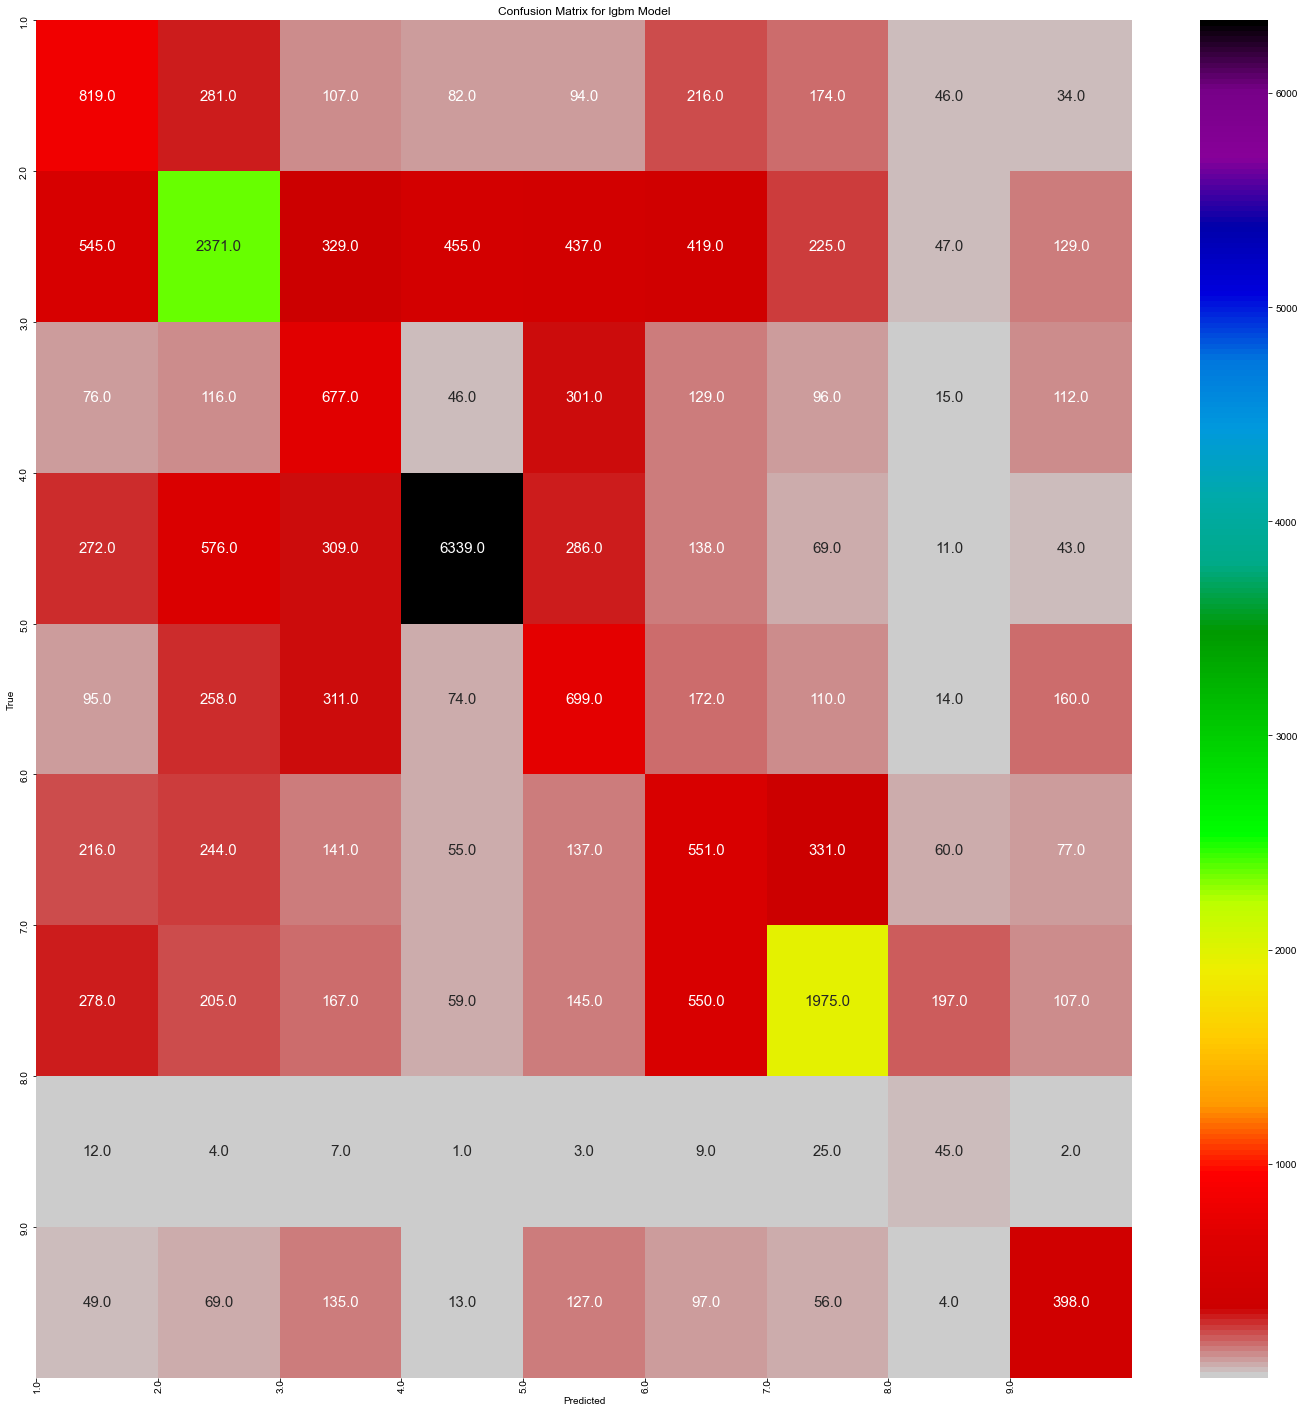

In [128]:
plot_confusion_matrix(y_test, y_pred, 'lgbm')

<BarContainer object of 15 artists>

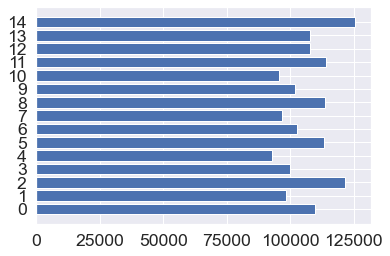

In [133]:
import matplotlib.pyplot as plt
plt.barh(automl2.model.estimator.feature_name_, automl2.model.estimator.feature_importances_)

-----

In [138]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from sklearn import neural_network
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [139]:
#######################
### Neural Network (Solver=adam)
#######################
estimator_MLP_C = MLPClassifier(batch_size='auto', warm_start=True, solver='adam', max_iter=400, early_stopping=True)
parameters_MLP_C = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'beta_1': (0.1,0.9,0.1),
    'beta_2': (0.1,0.9,0.1),
                   }
# with GridSearch
grid_search_MLP_C = GridSearchCV(
    estimator=estimator_MLP_C,
    param_grid=parameters_MLP_C,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [140]:
MLP_1_C=grid_search_MLP_C.fit(X_train, y_train)

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

In [141]:
y_pred_MLP1_C =MLP_1_C.predict(X_test)

In [142]:
print('Accuracy Score - Neural Net (adam) - Poly = 1:', metrics.accuracy_score(y_test, y_pred_MLP1_C))

Accuracy Score - Neural Net (adam) - Poly = 1: 0.5205710838528051


In [145]:
#######################
### Neural Network (Solver=adam)
#######################
estimator_MLP_C2 = MLPClassifier(batch_size='auto', warm_start=True, solver='adam', max_iter=400, early_stopping=True)
parameters_MLP_C = {
    'hidden_layer_sizes': (200,200,200),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'beta_1': (0.1,0.9,0.1),
    'beta_2': (0.1,0.9,0.1),
                   }
# with GridSearch
grid_search_MLP_C2 = GridSearchCV(
    estimator=estimator_MLP_C,
    param_grid=parameters_MLP_C,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [146]:
MLP_1_C=grid_search_MLP_C2.fit(X_train, y_train)

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

In [149]:
y_pred_MLP1_C2 =MLP_1_C.predict(X_test)

In [150]:
print('Accuracy Score - Neural Net (adam) - Poly = 1:', metrics.accuracy_score(y_test, y_pred_MLP1_C2))

Accuracy Score - Neural Net (adam) - Poly = 1: 0.5017092298411422


In [151]:
#######################
### Neural Network (Solver=sgd)
#######################

estimator_MLP_B = MLPClassifier(batch_size='auto', warm_start=True, solver='sgd', max_iter=400, early_stopping=True)
parameters_MLP_B = {
    'hidden_layer_sizes': (10,120,10),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'alpha': (0.000001, 0.00001, 0.0001),
    'learning_rate': ('constant', 'invscaling', 'adaptive'),
    'momentum': (0.1,0.9,0.1),
                   }
# with GridSearch
grid_search_MLP_B = GridSearchCV(
    estimator=estimator_MLP_B,
    param_grid=parameters_MLP_B,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [152]:
MLP_1_B=grid_search_MLP_B.fit(X_train, y_train)

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\HP\.conda\envs\mlhub\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with

In [153]:
y_pred_MLP1_B =MLP_1_B.predict(X_test)

In [155]:

print('Accuracy Score - Neural Net (sgd) - Poly = 1:', metrics.accuracy_score(y_test, y_pred_MLP1_B)) 
print('')
print('')

Accuracy Score - Neural Net (sgd) - Poly = 1: 0.5046048662779007




In [3]:
df= pd.read_csv('X_competition_test2.csv')

In [4]:
df

,field_id,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,5,25.338912,57.849372,63.888424,95.857741,82.410042,24.659693,58.336123,64.128312,96.397490,...,18.099024,41.273361,44.983264,63.504881,51.768480,10.708508,37.821478,40.506276,55.444909,39.940028
1,10,12.673903,44.337675,58.312108,98.427882,66.748191,11.877955,42.878437,56.268210,97.512783,...,9.410034,48.441872,61.274481,76.235408,47.100338,7.269175,70.488664,81.930053,50.122528,26.703811
2,11,30.835383,69.647114,81.974456,130.443709,117.857143,28.154210,62.718070,73.766320,110.288553,...,30.865658,71.223273,84.051088,130.246925,117.078524,30.122990,71.839167,84.901608,131.572375,118.707663
3,17,22.727632,78.080263,85.432895,126.073684,108.928947,23.014474,77.696053,84.475000,123.428947,...,21.000000,80.238158,86.269737,124.553947,109.815789,19.930263,78.715789,84.532895,121.497368,106.414474
4,18,12.600000,47.968421,54.368421,92.747368,80.694737,9.642105,46.452632,53.168421,89.642105,...,9.178947,46.031579,52.336842,90.221053,79.105263,7.515789,45.378947,51.989474,88.042105,77.494737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35290,122722,13.075325,69.011948,73.422597,110.431948,97.930130,10.324935,64.930649,69.270390,105.489610,...,11.067532,67.662857,72.104935,108.154026,95.893247,9.210909,63.010130,67.638701,105.133766,93.091688
35291,122724,20.250681,60.121253,75.517711,92.824251,65.837875,20.070845,57.653951,72.301090,91.998638,...,18.280654,45.450954,57.166213,88.170300,68.847411,9.839237,34.608992,43.147139,54.362398,37.177112
35292,122726,21.724047,62.036794,69.582129,104.942181,91.239159,21.671485,63.771353,71.897503,107.265440,...,14.519054,53.060447,62.118265,92.934297,82.056505,15.717477,51.708279,59.264126,88.846255,78.848883
35293,122730,16.652720,48.690377,62.000000,102.807531,74.589958,16.255230,48.510460,61.276151,102.853556,...,16.761506,45.811715,58.150628,99.255230,73.920502,17.435146,45.690377,56.870293,103.284519,80.079498
